#                                         CLUSTERING ASSIGNMENT

# Import Libraries

In [1055]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')




import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Import Data

In [1056]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Analyze Data

In [1057]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1058]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# Clean the data

In [1059]:
df.isnull().mean()*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no null values in the data

Change the data of Imports , Health , Exports as they may impact the model hence would change it to value of GDP

In [1060]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1061]:
df['imports']=df['imports']*df['gdpp']
df['exports']=df['exports']*df['gdpp']
df['health']=df['health']*df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610,9.44,56.2,5.82,553
1,Albania,16.6,114520.0,26789.50,198774.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,171264.0,18598.20,140044.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,219919.0,10060.50,151437.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100,1.44,76.8,2.13,12200


# Exploratory Data Analysis

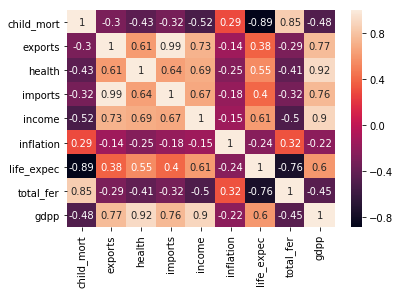

In [1062]:
co=df.corr()
sns.heatmap(co,annot=True)
plt.show()

In [1063]:
df.columns

Index([u'country', u'child_mort', u'exports', u'health', u'imports', u'income',
       u'inflation', u'life_expec', u'total_fer', u'gdpp'],
      dtype='object')

We can see that there are some correlation beween variables 

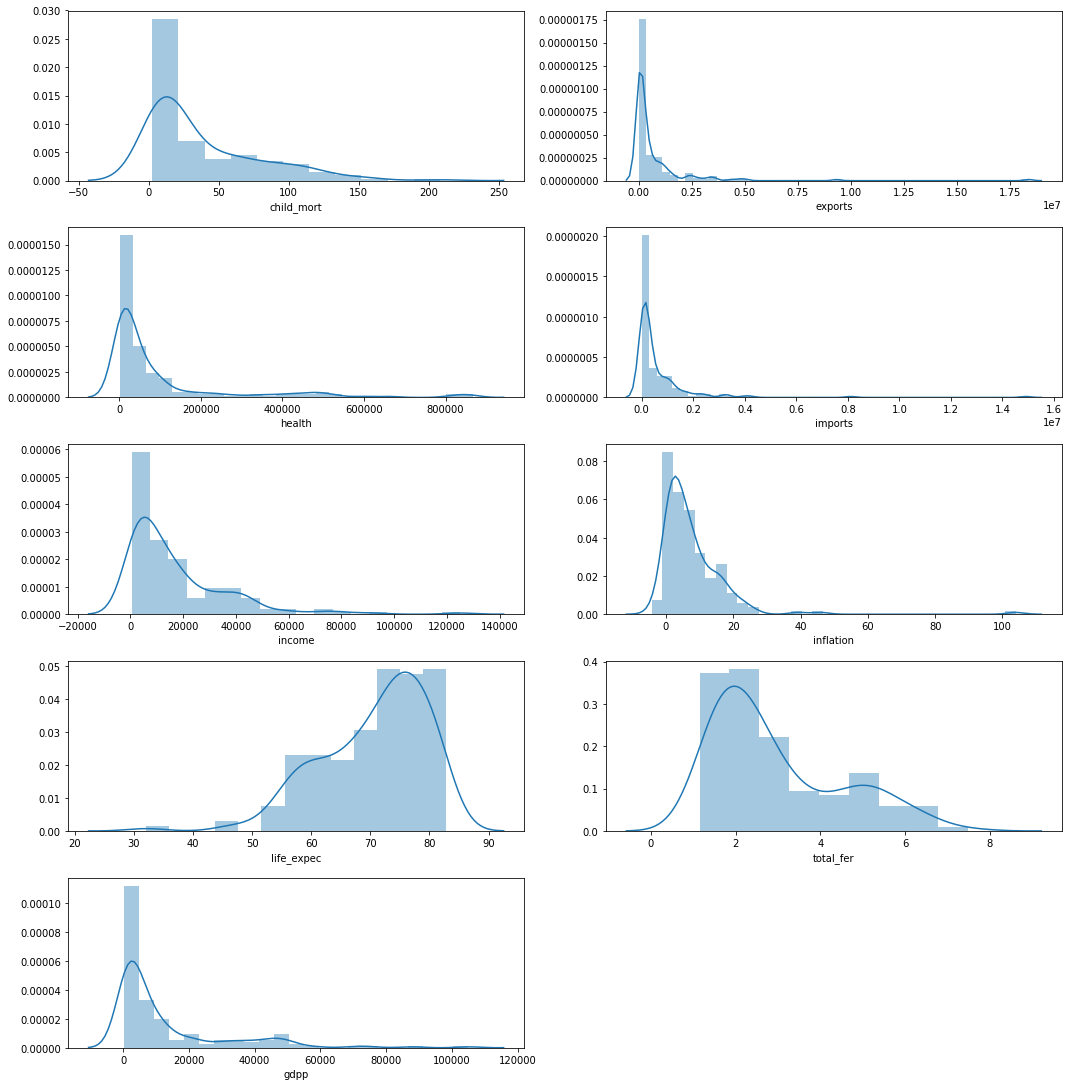

In [1064]:
plt.figure(figsize=(15,15))
attr=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(attr):
    plt.subplot(5,2,i[0]+1)
    plt.tight_layout()
    sns.distplot(df[i[1]])


 # Prepare the data for modelling 

Identifying the outliers

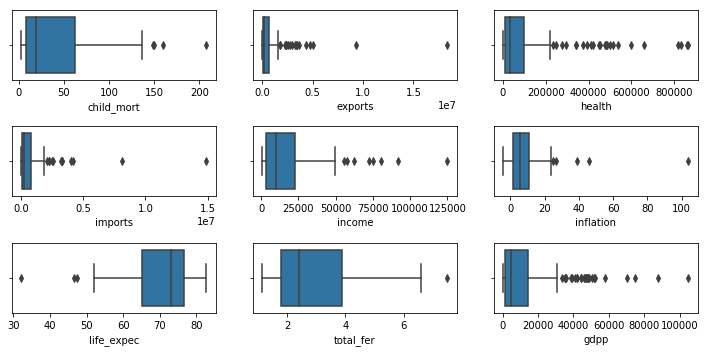

In [1065]:
plt.figure(figsize=(10,5))
lab=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(lab):
    plt.subplot(3,3,i[0]+1)
    plt.tight_layout()
    sns.boxplot(df[i[1]])
    

In [1066]:
# CAPPING METHOD

# Capping Child_Mortality with 0.01-0.99 capping

q1=df['child_mort'].quantile(0.01)
q4=df['child_mort'].quantile(0.99)

df['child_mort'][df['child_mort']<=q1]=q1
df['child_mort'][df['child_mort']>=q4]=q4

# Capping Exports with 0.01-0.99 capping

q1=df['exports'].quantile(0.05)
q4=df['exports'].quantile(0.95)

df['exports'][df['exports']<=q1]=q1
df['exports'][df['exports']>=q4]=q4


# Capping Health with 0.01-0.99 capping

q1=df['health'].quantile(0.05)
q4=df['health'].quantile(0.95)

df['health'][df['health']<=q1]=q1
df['health'][df['health']>=q4]=q4


# Capping Imports with 0.01-0.99 capping

q1=df['imports'].quantile(0.05)
q4=df['imports'].quantile(0.95)

df['imports'][df['imports']<=q1]=q1
df['imports'][df['imports']>=q4]=q4


# Capping income with 0.01-0.99 capping

q1=df['income'].quantile(0.05)
q4=df['income'].quantile(0.95)

df['income'][df['income']<=q1]=q1
df['income'][df['income']>=q4]=q4

# Capping inflation with 0.01-0.99 capping

q1=df['inflation'].quantile(0.05)
q4=df['inflation'].quantile(0.95)

df['inflation'][df['inflation']<=q1]=q1
df['inflation'][df['inflation']>=q4]=q4

# Capping life_expec with 0.01-0.99 capping

q1=df['life_expec'].quantile(0.05)
q4=df['life_expec'].quantile(0.95)

df['life_expec'][df['life_expec']<=q1]=q1
df['life_expec'][df['life_expec']>=q4]=q4


# Capping Total Fertility with 0.01-0.99 capping

q1=df['total_fer'].quantile(0.01)
q4=df['total_fer'].quantile(0.99)

df['total_fer'][df['total_fer']<=q1]=q1
df['total_fer'][df['total_fer']>=q4]=q4

# Capping gdpp with 0.03-0.97 capping

q1=df['gdpp'].quantile(0.05)
q4=df['gdpp'].quantile(0.95)

df['gdpp'][df['gdpp']<=q1]=q1
df['gdpp'][df['gdpp']>=q4]=q4



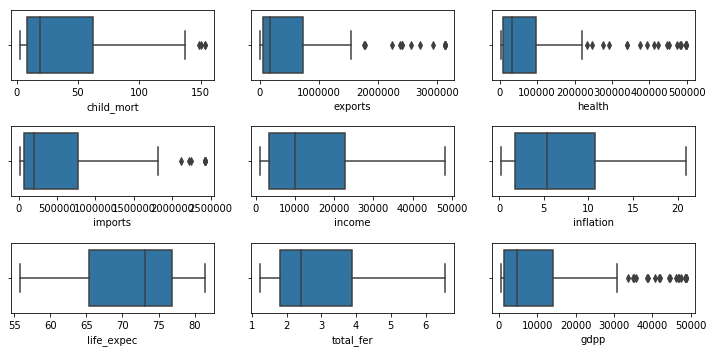

In [1067]:
plt.figure(figsize=(10,5))
lab=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(lab):
    plt.subplot(3,3,i[0]+1)
    plt.tight_layout()
    sns.boxplot(df[i[1]])

In [1068]:
# SCALING DATA to give equal importance to all the data

In [1069]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.00000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,5.784478e+05,95436.61915,5.142510e+05,15755.491018,7.016075,70.830060,2.942896,12003.719162
std,39.026793,8.579137e+05,145319.83725,6.694383e+05,14770.353771,6.271398,8.039216,1.497595,15154.443890
min,2.800000,7.046880e+03,2671.59200,1.692810e+04,1213.000000,0.183400,55.780000,1.243200,465.900000
25%,8.250000,4.471400e+04,7853.55000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.60000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.00000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,3.138510e+06,496670.10000,2.424156e+06,48290.000000,20.870000,81.400000,6.563600,48610.000000


In [1070]:
# Scaling by using StandardScaler Scaling method

rfm_df = df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
scaler = StandardScaler()

# Fit_data
df_scaled = scaler.fit_transform(rfm_df)
df_scaled.shape


(167L, 9L)

We will create a dataframe of df_scaled

In [1071]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = [['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,1.926928,-0.757874
1,-0.547543,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.865911,-0.523775
2,-0.272548,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.035427,-0.499286
3,2.084186,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.154642,-0.560839
4,-0.709457,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.544433,0.012991


In [1072]:
# Hopkins Test 

In [1073]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
import pandas as pd
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(df_scaled)

0.8354848951069419

The Hopkins Value is at higher range of values varying near 87 to 93 , indicates that the clustering is good enough

# Find the Value of K using
 1. Elbow Curve 
 2. Silhoutte Analysis

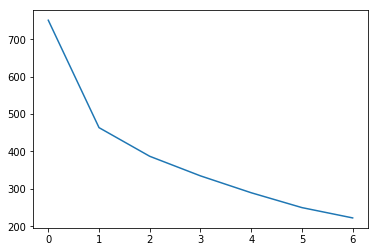

In [1074]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=75)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

From the Elbow curve we can see that the optimal value of K is 3 , we will recheck using Silhoutte Analysis 

# Silhouette Analysis

In [1075]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
sil = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=75)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.48391235711
For n_clusters=3, the silhouette score is 0.41426749524
For n_clusters=4, the silhouette score is 0.382273362419
For n_clusters=5, the silhouette score is 0.29523618067
For n_clusters=6, the silhouette score is 0.295340600226
For n_clusters=7, the silhouette score is 0.329993297594
For n_clusters=8, the silhouette score is 0.317722463531


In [1076]:
# We would try with k=3
kmeans = KMeans(n_clusters=3, max_iter=75)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=75,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1077]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [1078]:
# assign the label
df['Cluster_Kmeans']= kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Kmeans
0,Afghanistan,90.2,7046.88,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,114520.00,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,171264.00,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,219919.00,10060.50,151437.0,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,555100.00,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,1


In [1079]:
df['Cluster_Kmeans'].value_counts()

1    82
0    48
2    37
Name: Cluster_Kmeans, dtype: int64

# Analyse the Cluster-Wise based on Child_Mortality , Income , GDP

In [1080]:
df2=df[['country','child_mort','income','gdpp','Cluster_Kmeans']]
df2.head()

,country,child_mort,income,gdpp,Cluster_Kmeans
0,Afghanistan,90.2,1610.0,553.0,0
1,Albania,16.6,9930.0,4090.0,1
2,Algeria,27.3,12900.0,4460.0,1
3,Angola,119.0,5900.0,3530.0,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,1


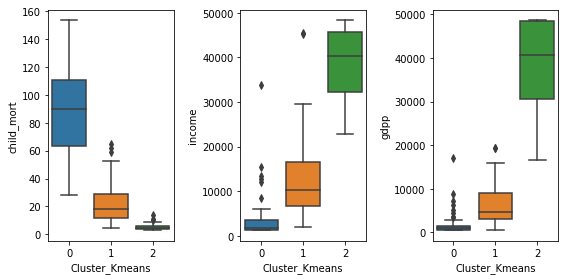

In [1081]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster_Kmeans', y='child_mort', data=df2)
plt.subplot(1,3,2)
sns.boxplot(x='Cluster_Kmeans', y='income', data=df2)
plt.subplot(1,3,3)
sns.boxplot(x='Cluster_Kmeans', y='gdpp', data=df2)
plt.tight_layout()
plt.show()

In [1082]:
# Countries  with high Child Mortality

df2[df2['Cluster_Kmeans']==0].sort_values('child_mort',ascending=False).head()

,country,child_mort,income,gdpp,Cluster_Kmeans
132,Sierra Leone,153.4,1220.0,465.9,0
66,Haiti,153.4,1500.0,662.0,0
32,Chad,150.0,1930.0,897.0,0
31,Central African Republic,149.0,1213.0,465.9,0
97,Mali,137.0,1870.0,708.0,0


In [1083]:
# Countries with high GDP

df2[df2['Cluster_Kmeans']==1].sort_values('gdpp',ascending=False).head()

,country,child_mort,income,gdpp,Cluster_Kmeans
115,Oman,11.7,45300.0,19300.0,1
128,Saudi Arabia,15.7,45400.0,19300.0,1
13,Barbados,14.2,15300.0,16000.0,1
51,Estonia,4.5,22700.0,14600.0,1
163,Venezuela,17.1,16500.0,13500.0,1


# Visualization Of Clusters

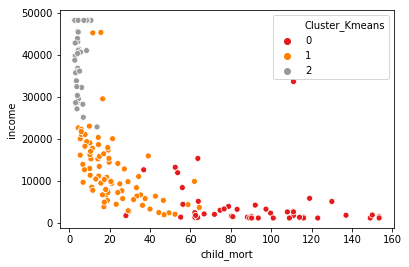

In [1084]:
sns.scatterplot(x="child_mort",y="income",hue="Cluster_Kmeans",data=df2,palette="Set1")

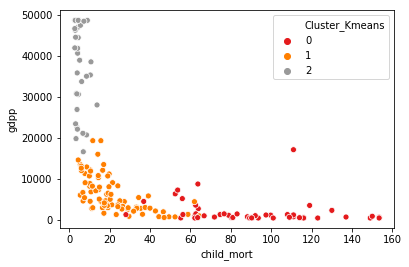

In [1085]:
sns.scatterplot(x="child_mort",y="gdpp",hue="Cluster_Kmeans",data=df2,palette="Set1")

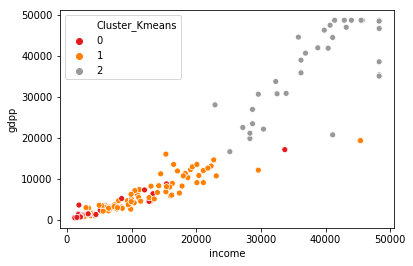

In [1086]:
sns.scatterplot(x="income",y="gdpp",hue="Cluster_Kmeans",data=df2,palette="Set1")

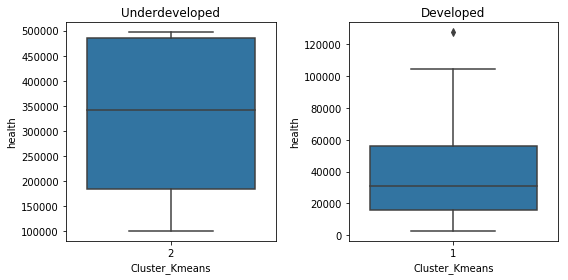

In [1087]:
# Understanding the Spend on Health of Developed Countries and Underdeveloped Countries 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ab=df[df['Cluster_Kmeans']==2].sort_values('health',ascending=False)# Underdeveloped Countries spend on Health
plt.title('Underdeveloped')
sns.boxplot(x='Cluster_Kmeans',y='health',data=ab)
plt.subplot(1,2,2)
cd=df[df['Cluster_Kmeans']==1].sort_values('health',ascending=False)# Developed Countries spend on Health
plt.title('Developed')
sns.boxplot(x='Cluster_Kmeans',y='health',data=cd)
plt.tight_layout()
plt.show()

It Can be observed that developed countries spend more on Health as compared to Underdeveloped countries .So NGO should consider spending the money in health for underdeveloped country

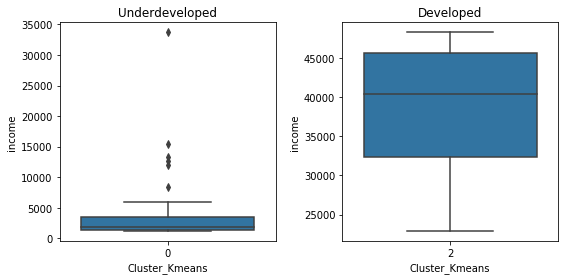

In [1103]:
# Understanding the Spend on Health of Developed Countries and Underdeveloped Countries 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ij=df[df['Cluster_Kmeans']==0].sort_values('income',ascending=False)# Underdeveloped Countries spend on Health
plt.title('Underdeveloped')
sns.boxplot(x='Cluster_Kmeans',y='income',data=ij)
plt.subplot(1,2,2)
kl=df[df['Cluster_Kmeans']==2].sort_values('exports',ascending=False)# Developed Countries spend on Health
plt.title('Developed')
sns.boxplot(x='Cluster_Kmeans',y='income',data=kl)
plt.tight_layout()
plt.show()

It Can be observed that underdeveloped countries have less income per person as compared to developed countries which might be due to less Jobs available. So would recommend NGO to spend money on More Job Creations

# Hierarchical Clustering

In [1090]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,1.926928,-0.757874
1,-0.547543,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.865911,-0.523775
2,-0.272548,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.035427,-0.499286
3,2.084186,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.154642,-0.560839
4,-0.709457,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.544433,0.012991


In [1091]:
df3=df2[['country','child_mort','income','gdpp']]
df3.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610.0,553.0
1,Albania,16.6,9930.0,4090.0
2,Algeria,27.3,12900.0,4460.0
3,Angola,119.0,5900.0,3530.0
4,Antigua and Barbuda,10.3,19100.0,12200.0


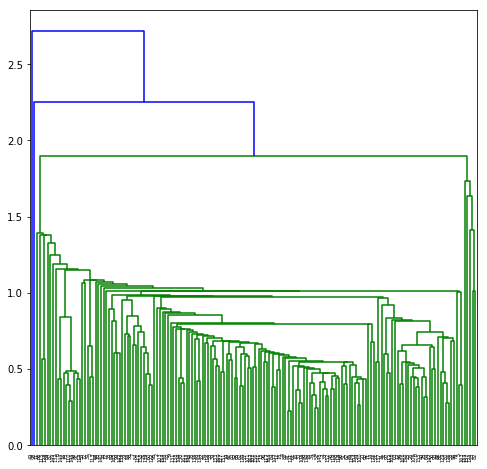

In [1092]:
# SINGLE LINKAGE
plt.figure(figsize=(8,8))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

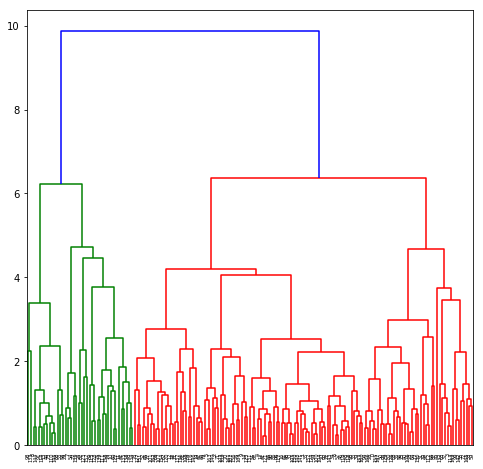

In [1093]:
# COMPLETE LINKAGE
plt.figure(figsize=(8,8))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [1094]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [1095]:
df3['Cluster_H'] = cluster_labels
df3.head()

,country,child_mort,income,gdpp,Cluster_H
0,Afghanistan,90.2,1610.0,553.0,0
1,Albania,16.6,9930.0,4090.0,1
2,Algeria,27.3,12900.0,4460.0,1
3,Angola,119.0,5900.0,3530.0,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,1


In [1096]:
df3['Cluster_H'].value_counts()

1    86
0    41
2    40
Name: Cluster_H, dtype: int64

# Visualisation of Clusters

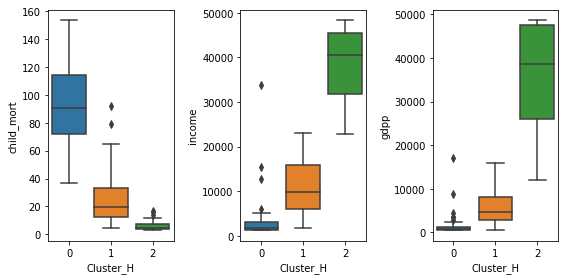

In [1097]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster_H', y='child_mort', data=df3)
plt.subplot(1,3,2)
sns.boxplot(x='Cluster_H', y='income', data=df3)
plt.subplot(1,3,3)
sns.boxplot(x='Cluster_H', y='gdpp', data=df3)
plt.tight_layout()
plt.show()

# Visualisation of Clusters in Hierarchical Clustering and Comparing with K-means 

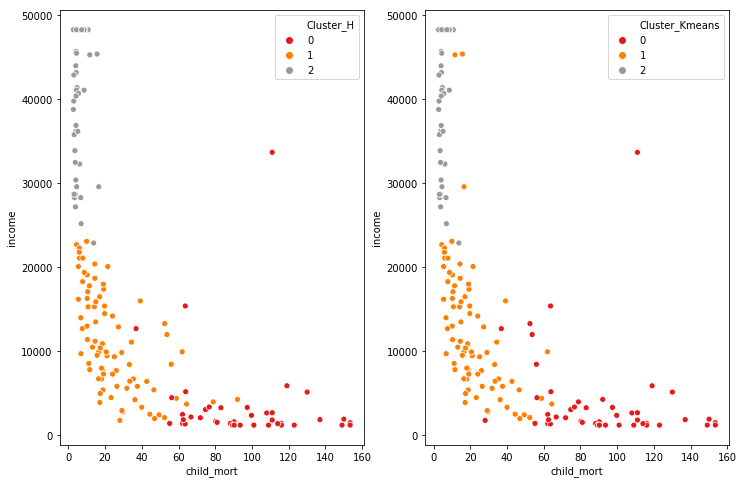

In [1098]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(x="child_mort",y="income",hue="Cluster_H",data=df3,palette="Set1")
plt.subplot(1,2,2)
sns.scatterplot(x="child_mort",y="income",hue="Cluster_Kmeans",data=df2,palette="Set1")
plt.show()

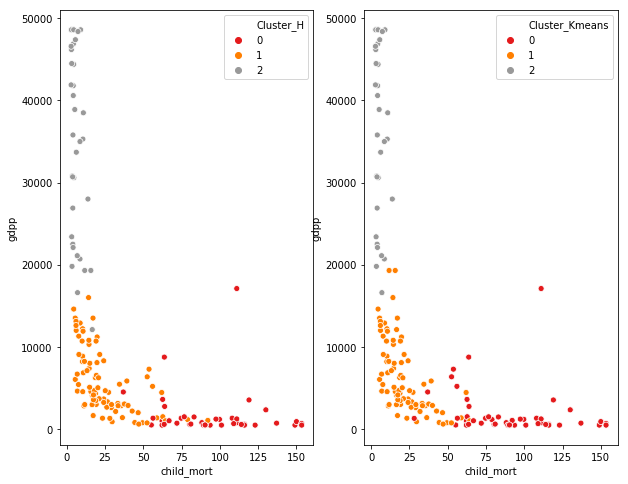

In [1099]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.scatterplot(x="child_mort",y="gdpp",hue="Cluster_H",data=df3,palette="Set1")
plt.subplot(1,2,2)
sns.scatterplot(x="child_mort",y="gdpp",hue="Cluster_Kmeans",data=df2,palette="Set1")
plt.show()

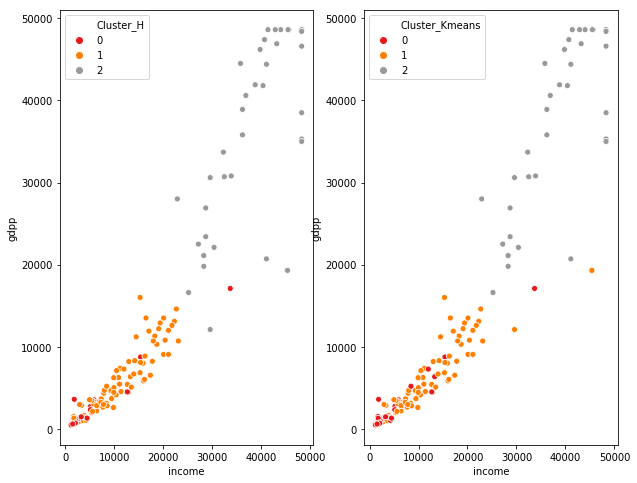

In [1100]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.scatterplot(x="income",y="gdpp",hue="Cluster_H",data=df3,palette="Set1")
plt.subplot(1,2,2)
sns.scatterplot(x="income",y="gdpp",hue="Cluster_Kmeans",data=df2,palette="Set1")
plt.show()

In [1101]:
df2[df2['Cluster_Kmeans']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,income,gdpp,Cluster_Kmeans
132,Sierra Leone,153.4,1220.0,465.9,0
66,Haiti,153.4,1500.0,662.0,0
32,Chad,150.0,1930.0,897.0,0
31,Central African Republic,149.0,1213.0,465.9,0
97,Mali,137.0,1870.0,708.0,0


In [1102]:
df3[df3['Cluster_H']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,income,gdpp,Cluster_H
132,Sierra Leone,153.4,1220.0,465.9,0
66,Haiti,153.4,1500.0,662.0,0
32,Chad,150.0,1930.0,897.0,0
31,Central African Republic,149.0,1213.0,465.9,0
97,Mali,137.0,1870.0,708.0,0


Recommendation: At least 5 countries which are in direct need of aid from the analysis work are .    
 
 
 
 
 1.Haiti
 
 
 2.Sierra Leone
 
 
 
 3.Chad
 
 
 
 
 4.Central African Republic
 
 
 
 5.Mali